This notebook focusses on the Inverse Translation Approximation Method (ITAM). The inverse translation of a lognormal process i.e. identifying the underlying gaussian stochastic proccess is carried out. Firstly, the sample generation code and translation is presented, details of which can be found in 'Translation.ipynb'.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = 100  # Total time
nt = 256  # Num of Discretized Time
dt = T / nt

F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dw = F / nw
t_u = 2*np.pi/2/F
if dt>t_u:
    print('Error (aliasing)')

# Generation of Input Data(Stationary)
t = np.linspace(0, T - dt, nt)
w = np.linspace(0, F - dw, nw)

# Compute the power spectral density S(w) at various points frequencies w
S = 130 / 4 * w ** 2 * np.exp(-5 * w)
n_sim = 1000

from UQpy.StochasticProcess import SRM
SRM_object = SRM(n_sim, S=S, dw=dw, nt=nt, nw=nw, case='uni')
samples = SRM_object.samples

from UQpy.StochasticProcess import Translation

Translate_object = Translation('lognormal', [0.5, 0, np.exp(0.5)], dt, dw, nt, nw, S_g=S, samples_g=SRM_object.samples)
samples_ng = Translate_object.samples_ng
samples_ng = samples_ng - np.mean(samples_ng)
R_ng = Translate_object.R_ng
S_ng = Translate_object.S_ng

Next, we identify the gaussian corelation function which upon translation yields the lognormal corelation

In [2]:
from UQpy.StochasticProcess import InverseTranslation

Inverse_translate_object = InverseTranslation('lognormal', [0.5, 0, np.exp(0.5)], dt, dw, nt, nw, R_ng=R_ng)
R_g_inv = Inverse_translate_object.R_g
S_g_inv = Inverse_translate_object.S_g

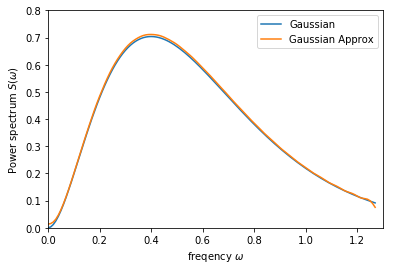

In [3]:
fig7 = plt.figure()
# plt.plot(w, S_ng, label='non_Gaussian')
plt.plot(w, S, label='Gaussian')
plt.plot(w, S_g_inv, label='Gaussian Approx')
plt.xlabel('freqency $\omega$')
plt.ylabel('Power spectrum $S(\omega)$')
plt.xlim(0, 1.3)
plt.ylim(0, 0.8)
plt.legend(loc='upper right')
plt.show()